<a href="https://colab.research.google.com/github/ZiadMotagaly/facenet/blob/main/Siamese_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
 import matplotlib
 import matplotlib.pyplot as plt
 import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K

In [ ]:
from sklearn import datasets
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [ ]:
oliv['target'].shape

(400,)

In [ ]:
labels=oliv['target']

In [ ]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [ ]:
KP=oliv['images']
KP.shape

(400, 64, 64)

In [ ]:
rgb_batch.shape

(400, 64, 64, 3)

In [ ]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

### **LOAD DATA**


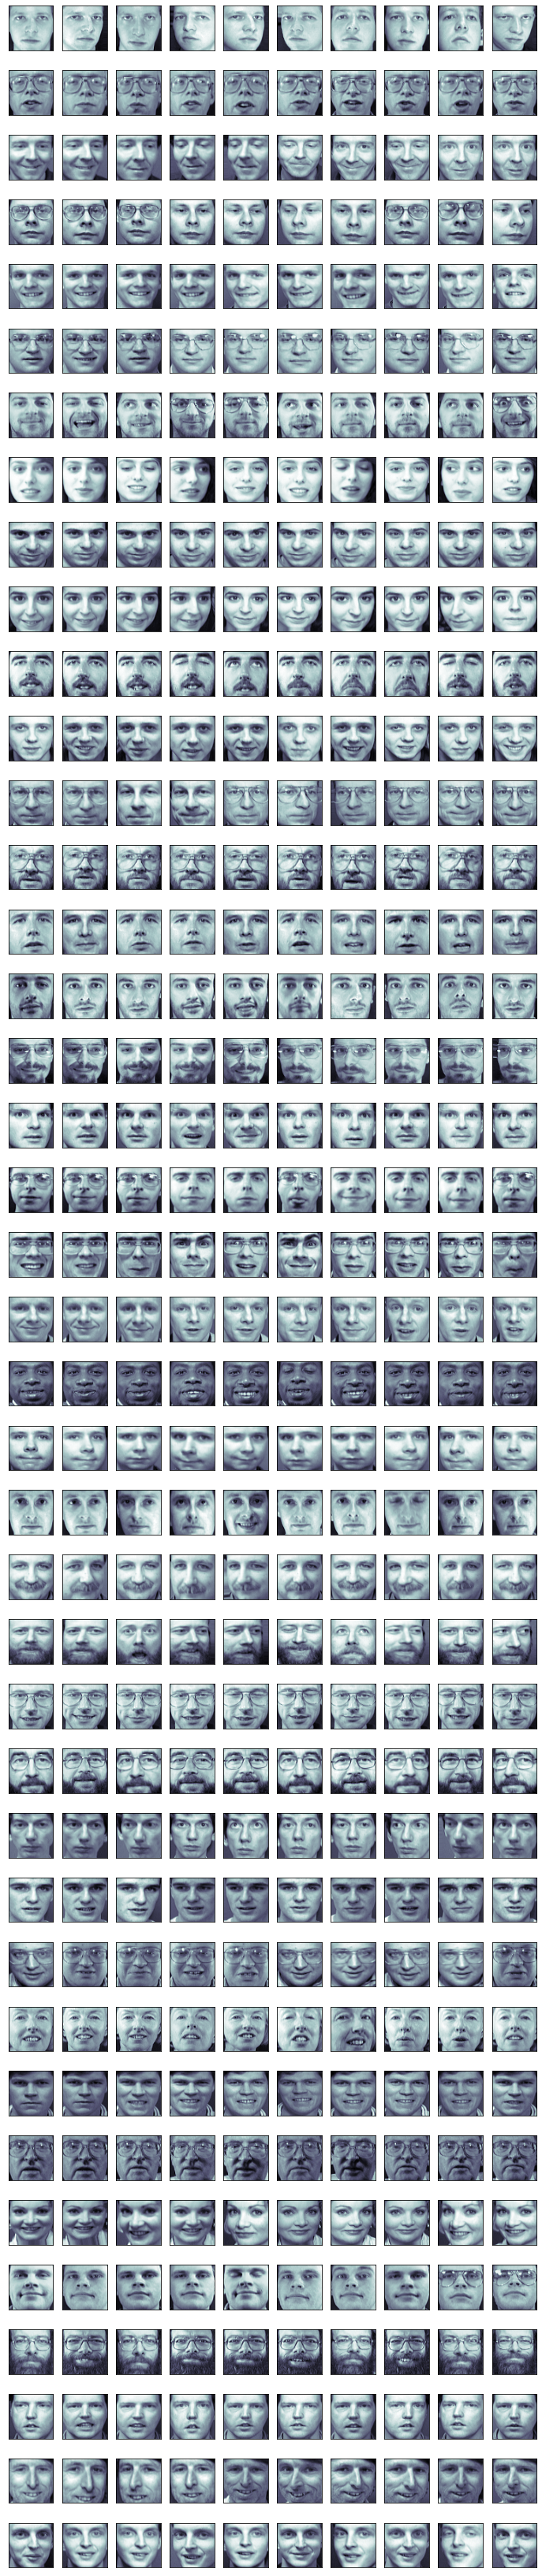

In [ ]:
fig = plt.figure(figsize=(12,60))

for i in range(400):
    ax= fig.add_subplot(40,10,i+1)
    ax.imshow(KP[i], cmap=plt.cm.bone)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

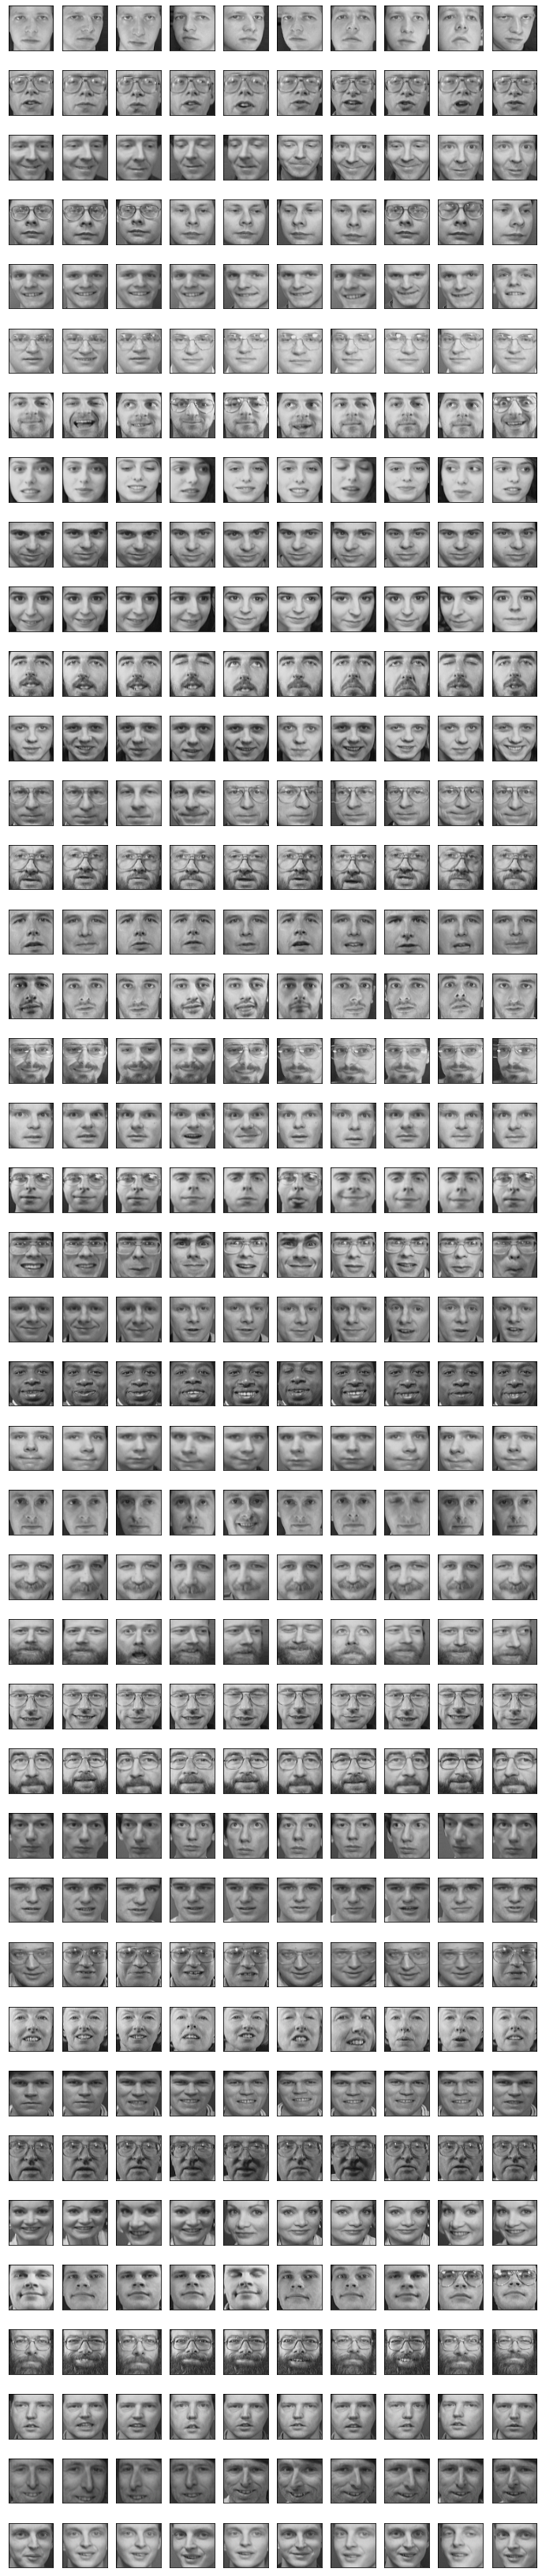

In [ ]:
fig = plt.figure(figsize=(12,60))

for i in range(400):
    ax= fig.add_subplot(40,10,i+1)
    ax.imshow(rgb_batch[i], cmap=plt.cm.bone)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

In [ ]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()

    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title(" id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

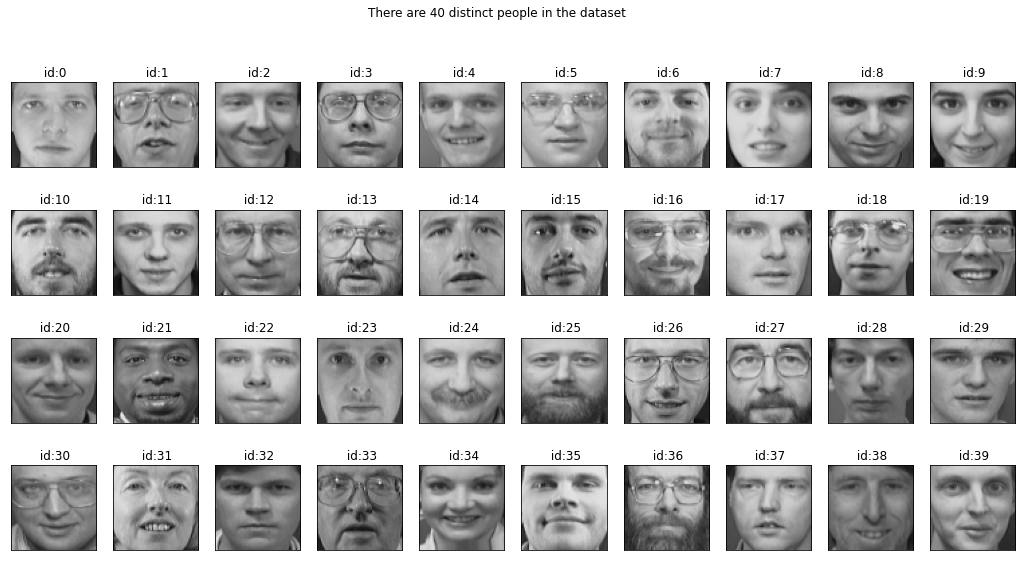

In [ ]:
show_40_distinct_people(rgb_batch, np.unique(labels))

In [ ]:
x_train,y_train,x_val,y_val=train_test_split(rgb_batch, labels, test_size=0.5, random_state=0)

In [ ]:
# import the necessary packages
import os
# specify the shape of the inputs for our network
IMG_SHAPE = (64, 64, 3)
# specify the batch size and number of epochs
BATCH_SIZE =(64,1)
EPOCHS = 100
# define the path to the base output directory
BASE_OUTPUT = "output"
# use the base output path to derive the path to the serialized
# model along with training history plot
MODEL_PATH = os.path.sep.join([BASE_OUTPUT,
	"contrastive_siamese_model"])
PLOT_PATH = os.path.sep.join([BASE_OUTPUT,
	"contrastive_plot.png"])

## create positive and negative pairs

In [ ]:
import random
def create_pairs(images, labels):
    # initialize two empty lists to hold the (image, image) pairs and
    # labels to indicate if a pair is positive or negative
    random.seed(2021)
    pairImages = []
    pairLabels = []

    # calculate the total number of classes present in the dataset
    # and then build a list of indexes for each class label that
    # provides the indexes for all examples with a given label
    numClasses = len(np.unique(y_val))
    classes=np.unique(y_val)
    idx = [np.where(y_val == classes[i]) for i in range(0, numClasses)]

    # loop over all images
    for idxA in range(len(images)):
        # grab the current image and label belonging to the current iteration
        currentImage = images[idxA]
        label = labels[idxA]

        # randomly pick an image that belongs to the *same* class
        # label
        posId = random.choice(list(np.where(labels == label)))
        posIdx =random.choice(posId)
        posImage = images[posIdx]

        # prepare a positive pair and update the images and labels
        pairImages.append([currentImage, posImage])
        pairLabels.append([1])

        # grab the indices for each of the class labels *not* equal to
        # the current label and randomly pick an image corresponding
        # to a label *not* equal to the current label
        negId = random.choice(list(np.where(labels != label)))
        negIdx =random.choice(negId)
        negImage = images[negIdx]

        # prepare a negative pair of images and update our lists
        pairImages.append([currentImage, negImage])
        pairLabels.append([0])

    return (np.array(pairImages), np.array(pairLabels))

(pairTrain, labelTrain)=create_pairs(x_train,y_train)
(pairTest, labelTest)=create_pairs(x_val, y_val)

In [ ]:
pairTrain.shape

(400, 2, 64, 64, 3)

In [ ]:
labelTrain.shape

(400, 1)

## CALCULATING THE EUCLIDIAN DISTANCE

In [ ]:
def euclidean_distance(vectors):
    # unpack the vectors into separate lists
    (featsA, featsB) = vectors
    # compute the sum of squared distances between the vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1,keepdims=True)
    # return the euclidean distance between the vectors
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))


### BUILD A SIAMESE MODEL

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
import tensorflow as tf

In [ ]:
from keras.applications.resnet50 import preprocess_input
from keras.utils.vis_utils import plot_model
import tensorflow as tf
def tf_siamese_nn(shape, embedding=64, fineTune=False):
    inputs = tf.keras.layers.Input(shape)
    preprocess_fn = preprocess_input
    base_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights=None, input_shape=shape)

    if fineTune==False:
        base_model.trainable=False
    else:
        base_model.trainable = True
        # Fine-tune from this layer onwards
        fine_tune_at = len(base_model.layers)-int(len(base_model.layers)*.10)# Freeze all the layers before the `fine_tune_at` layer
        for layer in base_model.layers[:fine_tune_at]:
          layer.trainable =  False
    x=base_model(inputs)
    x=tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs=tf.keras.layers.Dense(embedding)(x)
    model = tf.keras.Model(inputs, outputs)

    return model
model=tf_siamese_nn(IMG_SHAPE, 64, True)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
Total params: 14,747,520
Trainable params: 32,832
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# define the path to the base output directory
BASE_OUTPUT = "output"
# use the base output path to derive the path to the serialized
# model along with training history plot
MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "siamese_model"])
PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "plot.png"])

In [ ]:
def tf_siamese_nn(shape, embedding=64, fineTune=False):
    inputs = tf.keras.layers.Input(shape)
    preprocess_fn = preprocess_input
    base_model = tf.keras.applications.vgg16.VGG16(input_shape=shape, include_top=False, weights='imagenet')

    if fineTune==False:
        base_model.trainable=False
    else:
        base_model.trainable = True
        # Fine-tune from this layer onwards
        fine_tune_at = len(base_model.layers)-int(len(base_model.layers)*.10)# Freeze all the layers before the `fine_tune_at` layer
        for layer in base_model.layers[:fine_tune_at]:
          layer.trainable =  False
    x=base_model(inputs)
    x=tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs=tf.keras.layers.Dense(embedding)(x)
    model = tf.keras.Model(inputs, outputs)

    return model
model=tf_siamese_nn(IMG_SHAPE, 64, True)
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
Total params: 14,747,520
Trainable params: 32,832
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
img1 = tf.keras.layers.Input(shape=IMG_SHAPE)
img2 =  tf.keras.layers.Input( shape=IMG_SHAPE)
featureExtractor = tf_siamese_nn(IMG_SHAPE)
featsA = featureExtractor(img1)
featsB = featureExtractor(img2)


In [ ]:
distance = tf.keras.layers.Lambda(euclidean_distance)([featsA, featsB])

## BINARY CROSS ENTROPY

In [ ]:

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit([pairTrain[:, 0], pairTrain[:, 1]], labelTrain[:], validation_data=([pairTest[:, 0], pairTest[:, 1]], labelTest[:]),batch_size=32,epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
def build_siamese_model(inputShape, embeddingDim=48):
	# specify the inputs for the feature extractor network
	inputs = Input(inputShape)
	# define the first set of CONV => RELU => POOL => DROPOUT layers
	x = Conv2D(64, (2, 2), padding="same", activation="relu")(inputs)
	x = MaxPooling2D(pool_size=(2, 2))(x)
	x = Dropout(0.3)(x)
	# second set of CONV => RELU => POOL => DROPOUT layers
	x = Conv2D(64, (2, 2), padding="same", activation="relu")(x)
	x = MaxPooling2D(pool_size=2)(x)
	x = Dropout(0.3)(x)

  # prepare the final outputs
	pooledOutput = GlobalAveragePooling2D()(x)
	outputs = Dense(embeddingDim)(pooledOutput)
	# build the model
	model = Model(inputs, outputs)
	# return the model to the calling function
	return model